## Numpy 库

### 为什么要用Numpy

#### 低效的python for循环

【例】求100万个数的导数

In [1]:
def compute_reciprocals(values):
    res = []
    for value in values:
        res.append(1/value)    # 每遍历到一个元素，要判断其类型，并查找适用于该数据类型的正确函数
    return res 

values = list(range(1, 1000001))
%timeit compute_reciprocals(values)

101 ms ± 811 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


%timeit: ipython中统计运行时间的魔术方法

In [2]:
import numpy as np

values = np.arange(1, 1000001)
%timeit 1/values

2.21 ms ± 98.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**实现相同的计算，Numpy的运行速度是for循环的近30倍，产生了质的飞跃。**

#### Numpy为何如此高效

**Numpy由C语言编写。**

**1. 解释性语言 vs. 编译性语言**

C 语言执行前，对代码进行整体编译，执行速度更快。

**2. 连续单一类型存储 vs. 分散多变类型存储**

(1) Numpy数组内的数据类型必须是统一的，如同为浮点型，而Python中的列表，元组等可以存储不同类型数据。

(2) Numpy数组内的数据**连续存储在内存中**，而Python列表的数据则**分散在内存中**。

这种存储结构，与一些更加高效的底层处理方式更加契合。

**3. 多线程 vs.线程锁**

Python语言执行时有线程锁，无法实现真正的多线程并行，C无此限制。

#### 什么时候用Numpy

**在数据处理过程中，遇到使用“Python for循环”解决一些向量化、矩阵化操作的时候，可以用Numpy**

如： 两个向量的点积、矩阵乘法

### Numpy数组的创建

#### 从列表开始创建

In [3]:

arr = np.array([1,2,3,4,5])
print(arr) 
print(type(arr))
print(type(arr[0]))
print(arr.shape)

[1 2 3 4 5]
<class 'numpy.ndarray'>
<class 'numpy.int64'>
(5,)


- 设置数组的数据类型

In [4]:
arr = np.array([1,2,3,4,5,6], dtype="float64")
print(arr)
print(type(arr[0]))
print(arr.size)

[1. 2. 3. 4. 5. 6.]
<class 'numpy.float64'>
6


- 检查数组占用的内存空间大小

In [5]:
import sys

print("total size of arr: {}".format(sys.getsizeof(arr)))
print("unit size of arr: {}".format(sys.getsizeof(arr[0])))

total size of arr: 152
unit size of arr: 32


sys.getsizeof() 函数返回的是这个对象所占用的空间大小，对于数组来说，除了数组中每个值占用空间外，数组对象还会存储数组长度、数组类型等其他信息。

而如果只想要获取数组中存储的值的占用空间大小，可以使用 numpy.ndarray.nbytes ，使用 numpy.ndarray.itemsize 获取数组中每个值的占用空间大小。

In [6]:
print("total size of arr: {}".format(arr.nbytes))
print("unit size of arr: {}".format(arr.itemsize))

total size of arr: 48
unit size of arr: 8


- 二维数组

In [7]:
d_2 = np.array([[1,2,3], [4,5,6], [7,8,9]])
print(d_2)
print(d_2.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


#### 从头创建数组

（1） 创建长度为5的数组，值都为0

In [8]:
np.zeros(5, dtype=np.int64)

array([0, 0, 0, 0, 0])

（2） 创建一个2*4的浮点型数组，值都为1

In [9]:
np.ones((2,4), dtype=np.float).itemsize

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


8

(3) 创建一个3*3的浮点数据，值都为8.8

In [10]:
np.full((3,3), 8.8)

array([[8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8]])

(4) 创建一个3*3的单位矩阵

In [11]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

(5) 创建一个线性序列数组，从1开始到15， 间隔2 \[1,15)

In [12]:
np.arange(1, 15,2)

array([ 1,  3,  5,  7,  9, 11, 13])

(6) 创建一个4个元素的数组，这四个数均匀分配到\[0,1]

In [13]:
np.linspace(0, 1, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

(7) 创建一个10个元素的数组，形成1 - 10^9的等比数列

In [14]:
np.logspace(0, 9, 10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

(8) 创建一个3*3的，在0-1之间均匀分布的随机数构成的数组

In [15]:
np.random.random((3,3))

array([[0.61749566, 0.89162206, 0.64706003],
       [0.81160467, 0.9974258 , 0.97107628],
       [0.61586794, 0.11856925, 0.83229726]])

(9) 创建一个3*3的，均值为0， 标准差为1的正态分布随机数构成的数组


In [16]:
np.random.normal(0, 1, (3,3))

array([[-1.42811294,  0.47025791,  0.52081126],
       [-1.42949839,  0.32928764, -0.7368078 ],
       [ 0.52051824, -1.59637895,  0.76609177]])

(10) 创建一个3*3的，在\[0,10)之间随机整数构成的数组

In [17]:
np.random.randint(0, 10, (3,3))

array([[8, 0, 9],
       [7, 7, 8],
       [4, 7, 2]])

(10) 随机重排列


In [18]:
arr = np.array([10,20,30,40,50])
np.random.permutation(arr)    #产生新数组

array([10, 50, 30, 20, 40])

In [19]:
print(arr)   
np.random.shuffle(arr)    #改变原数组
print(arr)

[10 20 30 40 50]
[20 30 40 10 50]


（11）随机采样

- 按指定形状采样

In [20]:
arr = np.arange(10,25, dtype=np.float)
arr 

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22.,
       23., 24.])

In [21]:
np.random.choice(arr, size=(4,4))

array([[13., 24., 12., 23.],
       [21., 23., 10., 10.],
       [16., 13., 23., 14.],
       [20., 10., 15., 21.]])

- 按概率采样

In [22]:
np.random.choice(arr, size=(4,4), p=arr/sum(arr))

array([[22., 13., 17., 15.],
       [11., 14., 21., 18.],
       [22., 23., 23., 16.],
       [22., 19., 24., 18.]])

### Numpy数组的性质

#### 数组的属性

In [23]:
arr = np.random.randint(0, 10, (3,4))
arr 

array([[4, 3, 1, 3],
       [7, 3, 3, 6],
       [6, 4, 7, 6]])

In [24]:
print(arr.shape)    #数组形状
print(arr.ndim)     #数组维度

(3, 4)
2


In [25]:
y = np.arange(0, 10)
y.ndim

1

In [26]:
print(arr.size)    #数组大小，有多少个元素
print(arr.dtype)   #数组的数据类型
print(arr.itemsize) #每个元素所占内存空间的大小
print(arr.nbytes)   #数组所占内存空间的大小

12
int64
8
96


#### 数组索引

1. 一维数组索引

In [27]:
arr1 = np.arange(0, 10)
arr1 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
print(arr1[0])
print(arr1[-1])

0
9


2. 多维数组索引 - 以二维为例


In [29]:
arr2 = np.random.randint(0, 20, size=(3,3))
arr2 

array([[16, 19, 16],
       [17, 15, 10],
       [19, 17, 15]])

In [30]:
print(arr2[0,0])
print(arr2[1][1])

16
15


Numpy 数组的数据类型固定，当整形数组插入浮点数时，浮点数会向下取整

In [31]:
arr2[2,2] = 1.678
arr2 

array([[16, 19, 16],
       [17, 15, 10],
       [19, 17,  1]])

#### 数组的切片

1. 一维数组，跟列表一样

In [32]:
print(arr1[:3])
print(arr1[3:])
print(arr1[::-1])

[0 1 2]
[3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]


2. 多维数组 - 以二维为例


In [33]:
arr2 = np.random.randint(0,20, size=(3,4))
arr2 

array([[ 9, 14, 19, 16],
       [11, 17,  3,  0],
       [13, 12,  1,  6]])

In [34]:
arr2[:2, :3]

array([[ 9, 14, 19],
       [11, 17,  3]])

In [35]:
arr2[::-1,::-1]

array([[ 6,  1, 12, 13],
       [ 0,  3, 17, 11],
       [16, 19, 14,  9]])

（3） 获取数组的行和列

In [36]:
arr2

array([[ 9, 14, 19, 16],
       [11, 17,  3,  0],
       [13, 12,  1,  6]])

In [37]:
arr2[1, :]    #获取第一行，从0开始计数

array([11, 17,  3,  0])

In [38]:
arr2[1]    #获取第一行简写

array([11, 17,  3,  0])

In [39]:
arr2[:,2]    #获取第二列，从0开始计数

array([19,  3,  1])

（4） **切片获取的是视图，而非副本**

In [40]:
arr4 = np.random.randint(20, size=(3,4))
arr4 

array([[17, 16,  7, 19],
       [10, 18, 16,  6],
       [14,  9,  8, 13]])

In [41]:
arr5 = arr4[:2,:2]
arr5 

array([[17, 16],
       [10, 18]])

**注意：视图元素发生修改，则原数组亦发生相应的修改**

In [42]:
arr5[0][0] = 0
arr5

array([[ 0, 16],
       [10, 18]])

In [43]:
arr4 

array([[ 0, 16,  7, 19],
       [10, 18, 16,  6],
       [14,  9,  8, 13]])

**修改切片的安全方式: copy**

In [44]:
arr4 = np.random.randint(20, size=(3,4))
arr4 

array([[15, 17,  1, 14],
       [ 4,  9,  7, 13],
       [17, 13,  6, 17]])

In [45]:
arr6 = arr4[:2, :2].copy()
arr6 

array([[15, 17],
       [ 4,  9]])

In [46]:
arr6[0][0]=0
arr6

array([[ 0, 17],
       [ 4,  9]])

In [47]:
arr4

array([[15, 17,  1, 14],
       [ 4,  9,  7, 13],
       [17, 13,  6, 17]])

#### 数组的变形


In [48]:
arr5 = np.random.randint(0, 10, size=(12,))
arr5

array([4, 7, 2, 2, 6, 6, 9, 7, 0, 0, 8, 5])

In [49]:
arr5.shape 

(12,)

In [50]:
arr6 = arr5.reshape(3,4)
arr6

array([[4, 7, 2, 2],
       [6, 6, 9, 7],
       [0, 0, 8, 5]])

**注意：reshape返回的是视图，而非副本

In [51]:
arr6[0][0] = 6
arr6 

array([[6, 7, 2, 2],
       [6, 6, 9, 7],
       [0, 0, 8, 5]])

In [52]:
arr5 

array([6, 7, 2, 2, 6, 6, 9, 7, 0, 0, 8, 5])

可以用np.reshape().copy()的方法生成一个副本

In [53]:
arr5 = np.random.randint(0, 10, size=(12,))
arr5

array([5, 4, 9, 5, 8, 1, 2, 3, 0, 1, 6, 9])

In [54]:
arr7 = arr5.reshape(3,4).copy()
arr7

array([[5, 4, 9, 5],
       [8, 1, 2, 3],
       [0, 1, 6, 9]])

In [55]:
arr7[0][0]=8
arr7

array([[8, 4, 9, 5],
       [8, 1, 2, 3],
       [0, 1, 6, 9]])

In [56]:
arr5 

array([5, 4, 9, 5, 8, 1, 2, 3, 0, 1, 6, 9])

**一维向量转行向量**

In [57]:
arr6 = arr5.reshape(1, arr5.shape[0])
arr6

array([[5, 4, 9, 5, 8, 1, 2, 3, 0, 1, 6, 9]])

In [58]:
print(arr6.shape)    #注意和一维数组的区别
print(arr6.ndim)     #注意这里是2为数组了，而不是一维数组了

(1, 12)
2


In [59]:
arr7 = arr5[np.newaxis, :]    # 转行向量的另一个方式
arr7

array([[5, 4, 9, 5, 8, 1, 2, 3, 0, 1, 6, 9]])

**一维向量转列向量**

In [60]:
arr8 = arr5.reshape(arr5.shape[0],1)
arr8 

array([[5],
       [4],
       [9],
       [5],
       [8],
       [1],
       [2],
       [3],
       [0],
       [1],
       [6],
       [9]])

In [61]:
print(arr8.shape)
print(arr8.ndim)

(12, 1)
2


In [62]:
arr8 = arr5[:,np.newaxis]    #转列向量的另一个方式
arr8

array([[5],
       [4],
       [9],
       [5],
       [8],
       [1],
       [2],
       [3],
       [0],
       [1],
       [6],
       [9]])

**多维向量转一维向量**

In [63]:
arr6 = np.random.randint(0,10, size=(3,4))
arr6 

array([[3, 3, 8, 6],
       [1, 3, 3, 2],
       [7, 0, 9, 4]])

- flatten()返回的是副本

In [64]:
arr7 = arr6.flatten()
arr7

array([3, 3, 8, 6, 1, 3, 3, 2, 7, 0, 9, 4])

In [65]:
arr7[0]=11
arr7 

array([11,  3,  8,  6,  1,  3,  3,  2,  7,  0,  9,  4])

In [66]:
arr6 

array([[3, 3, 8, 6],
       [1, 3, 3, 2],
       [7, 0, 9, 4]])

- ravel()返回的是视图

In [67]:
arr8 = arr6.ravel()
arr8

array([3, 3, 8, 6, 1, 3, 3, 2, 7, 0, 9, 4])

In [68]:
arr8[0]=11
arr8

array([11,  3,  8,  6,  1,  3,  3,  2,  7,  0,  9,  4])

In [69]:
arr6 

array([[11,  3,  8,  6],
       [ 1,  3,  3,  2],
       [ 7,  0,  9,  4]])

- reshape返回的是视图

In [70]:
arr6 = np.random.randint(0,10, size=(3,4))
arr6 

array([[5, 8, 6, 3],
       [9, 9, 7, 3],
       [8, 8, 0, 2]])

In [71]:
arr9 = arr6.reshape(-1)
arr9

array([5, 8, 6, 3, 9, 9, 7, 3, 8, 8, 0, 2])

In [72]:
arr9[0]=11
arr9 

array([11,  8,  6,  3,  9,  9,  7,  3,  8,  8,  0,  2])

In [73]:
arr6 

array([[11,  8,  6,  3],
       [ 9,  9,  7,  3],
       [ 8,  8,  0,  2]])

#### 数组的拼接

In [74]:
arr1 = np.arange(1,7).reshape(2,3)
arr2 = np.arange(11,17).reshape(2,3)
print(arr1)
print(arr2)

[[1 2 3]
 [4 5 6]]
[[11 12 13]
 [14 15 16]]


1. 水平拼接 - 副本

In [75]:
arr3 = np.hstack([arr1, arr2])
arr3

array([[ 1,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16]])

In [76]:
arr3[0][0]=0
arr3 

array([[ 0,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16]])

In [77]:
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [78]:
# 水平拼接的另一个方法
arr4 = np.c_[arr1, arr2]
arr4

array([[ 1,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16]])

In [79]:
arr4[0][0]=0
arr4 

array([[ 0,  2,  3, 11, 12, 13],
       [ 4,  5,  6, 14, 15, 16]])

In [80]:
arr1

array([[1, 2, 3],
       [4, 5, 6]])

2. 垂直拼接 - 副本

In [81]:
arr5 = np.vstack([arr1, arr2])
arr5

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [11, 12, 13],
       [14, 15, 16]])

In [82]:
arr6 = np.r_[arr1, arr2]
arr6 

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [11, 12, 13],
       [14, 15, 16]])

#### 数组的分裂

##### split的用法

In [83]:
arr1 = np.arange(10)
arr1 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [84]:
arr2, arr3, arr4 = np.split(arr1, [2,7])    # 在数组第二，第7个位置前面分裂
arr2, arr3, arr4 

(array([0, 1]), array([2, 3, 4, 5, 6]), array([7, 8, 9]))

##### hsplit的用法

In [85]:
arr1 = np.arange(1, 26).reshape(5,5)
arr1 

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [86]:
left, middle, right = np.hsplit(arr1, [2,4])
print("Left: \n", left)
print("Middle: \n", middle)
print("Right: \n", right)

Left: 
 [[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]
Middle: 
 [[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]]
Right: 
 [[ 5]
 [10]
 [15]
 [20]
 [25]]


##### vsplit的用法

In [87]:
arr1 = np.arange(1, 26).reshape(5,5)
arr1 

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [88]:
upper, middle, lower = np.vsplit(arr1, [2,4])
print("Uppder:\n", upper)
print("Middle:\n", middle)
print("Lower:\n", lower)

Uppder:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
Middle:
 [[11 12 13 14 15]
 [16 17 18 19 20]]
Lower:
 [[21 22 23 24 25]]


### Numpy 四大运算

#### 向量化运算

- 与数字的加减乘除等

In [89]:
arr1 = np.arange(1,6)
arr1 

array([1, 2, 3, 4, 5])

In [90]:
print("arr1 + 5: ",arr1 + 5)
print("arr1 - 5: ",arr1 - 5)
print("arr1 * 5: ",arr1 * 5)
print("arr1 / 5: ",arr1 / 5)

arr1 + 5:  [ 6  7  8  9 10]
arr1 - 5:  [-4 -3 -2 -1  0]
arr1 * 5:  [ 5 10 15 20 25]
arr1 / 5:  [0.2 0.4 0.6 0.8 1. ]


In [91]:
print("-arr1: ", -arr1)
print("arr1 ** 2: ",arr1 ** 2)
print("arr1 // 5: ",arr1 // 5)
print("arr1 % 5: ",arr1 % 5)

-arr1:  [-1 -2 -3 -4 -5]
arr1 ** 2:  [ 1  4  9 16 25]
arr1 // 5:  [0 0 0 0 1]
arr1 % 5:  [1 2 3 4 0]


- 绝对值、三角函数、指数、对数

In [92]:
arr1 = np.array([-1,2,-3,4,-5,6])
arr1 

array([-1,  2, -3,  4, -5,  6])

In [93]:
np.abs(arr1)

array([1, 2, 3, 4, 5, 6])

In [94]:
arr1 = np.arange(1,6)
arr1

array([1, 2, 3, 4, 5])

In [95]:
np.exp(arr1)

array([  2.71828183,   7.3890561 ,  20.08553692,  54.59815003,
       148.4131591 ])

- 三角函数

In [96]:
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [97]:
print("sin(theta): ", np.sin(theta))
print("cos(theta): ", np.cos(theta))
print("tan(theta): ", np.tan(theta))

sin(theta):  [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta):  [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta):  [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [98]:
arr1 = [-1, 0, 1]
print("arcsin(theta): ", np.arcsin(theta))
print("arccos(theta): ", np.arccos(theta))
print("arctan(theta): ", np.arctan(theta))

arcsin(theta):  [ 0. nan nan]
arccos(theta):  [1.57079633        nan        nan]
arctan(theta):  [0.         1.00388482 1.26262726]


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in arcsin
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in arccos
  This is separate from the ipykernel package so we can avoid doing imports until


#### 矩阵运算

In [99]:
m = np.arange(9).reshape(3,3)
m 

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [100]:
# 转置
m.T

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [101]:
# 矩阵乘法

m = np.array([[0, 1], [2, 3]])
n = np.array([[1, 0], [3, 2]])


In [102]:
m.dot(n)

array([[ 3,  2],
       [11,  6]])

In [103]:
np.dot(m, n)

array([[ 3,  2],
       [11,  6]])

In [104]:
n.dot(m)

array([[0, 1],
       [4, 9]])

In [105]:
np.dot(n, m)

array([[0, 1],
       [4, 9]])

注意和 m * n 的区别


In [106]:
m * n 

array([[0, 0],
       [6, 6]])

#### 广播运算

In [107]:
arr1 = np.arange(3).reshape(1,3)
arr1

array([[0, 1, 2]])

In [108]:
arr1 + 5

array([[5, 6, 7]])

**规则**

如果两个数组形状在维度上不匹配，

那么数组的形式会沿着维度为1的维度进行扩展以匹配另一个数组

In [109]:
arr1 = np.ones((3,3))
arr1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [110]:
arr2 = np.arange(3).reshape(1,3)
arr2

array([[0, 1, 2]])

In [111]:
arr1 + arr2

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [112]:
arr3 = np.logspace(1, 10, 10, base=2).reshape(2, 5)
arr3

array([[   2.,    4.,    8.,   16.,   32.],
       [  64.,  128.,  256.,  512., 1024.]])

In [113]:
arr4 = np.array([[1,2,4,8,16]])
arr4

array([[ 1,  2,  4,  8, 16]])

In [114]:
arr3 / arr4 

array([[ 2.,  2.,  2.,  2.,  2.],
       [64., 64., 64., 64., 64.]])

In [115]:
arr5 = np.ones((3,1))
arr6 = np.arange(3).reshape(1,3)

In [116]:
arr5

array([[1.],
       [1.],
       [1.]])

In [117]:
arr6

array([[0, 1, 2]])

In [118]:
arr5+arr6  #将 1x3 和 3x1 的 向量都扩展为 3x3 的矩阵

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

#### 比较运算和掩码

##### 比较运算

In [119]:
arr1 = np.random.randint(1, 100, size=(10,10))
arr1 > 50

array([[False, False,  True, False, False, False, False, False,  True,
        False],
       [False,  True, False,  True,  True,  True, False,  True,  True,
        False],
       [ True,  True, False,  True, False, False, False, False,  True,
         True],
       [False, False,  True, False, False, False, False,  True, False,
         True],
       [ True, False,  True, False, False, False,  True, False, False,
         True],
       [ True,  True,  True, False,  True, False, False,  True,  True,
         True],
       [ True,  True, False, False, False,  True,  True,  True,  True,
         True],
       [False, False,  True, False, False,  True, False, False, False,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False,  True,
        False],
       [False,  True,  True, False, False, False, False, False, False,
         True]])

##### 操作布尔数组

In [120]:
arr2 = np.random.randint(10, size=(2,5))
arr2

array([[3, 1, 4, 7, 3],
       [9, 3, 7, 4, 1]])

In [121]:
print(arr2 > 5)
np.sum(arr2 > 5)

[[False False False  True False]
 [ True False  True False False]]


3

In [122]:
np.all(arr2 > 0)

True

In [123]:
np.any(arr2 == 6)    #至少有一个等于6

False

In [124]:
np.all(arr2 < 9, axis = 1)    #按行进行判断，是否每行的元素都小于9

array([ True, False])

In [125]:
np.all(arr2 > 3, axis = 0)    #按列进行判断，是否每列的元素都大于3

array([False, False,  True,  True, False])

In [126]:
(arr2 < 9) & (arr2 > 5)    #小于9，大于5的数

array([[False, False, False,  True, False],
       [False, False,  True, False, False]])

In [127]:
np.sum((arr2 < 9) & (arr2 > 5))

2

##### 将布尔数组作为掩码

In [128]:
arr1 = np.random.randint(1, 10, size=(3,4))
arr1

array([[2, 4, 6, 1],
       [6, 6, 6, 5],
       [9, 6, 8, 7]])

In [129]:
arr1 > 5

array([[False, False,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True]])

In [130]:
arr2[ arr2 > 5]

array([7, 9, 7])

#### 花哨的索引

##### 一维数组

In [133]:
arr1 = np.random.randint(100, size = 10)
arr1

array([41, 98, 31, 65, 94, 91, 91, 61, 34, 26])

**结果的形状与索引的形状一致**

In [134]:
idx = [2,6,9]
arr1[idx]

array([31, 91, 26])

In [135]:
idx = np.array([[1,0],
               [2,3]])
arr1[idx]

array([[98, 41],
       [31, 65]])

##### 多维数组

In [141]:
arr1 = np.arange(12).reshape(3,4)
arr1 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [142]:
row = np.array([0,1,2])
col = np.array([1,3,0])
arr1[row, col]    #arr1(0,1), arr1(1,3), arr1(2,0)

array([1, 7, 8])

In [143]:
row[:,np.newaxis]    #列向量

array([[0],
       [1],
       [2]])

In [140]:
arr1[row[:, np.newaxis], col]    #广播机制

array([[ 1,  3,  0],
       [ 5,  7,  4],
       [ 9, 11,  8]])

### 其他numpy常用函数

#### 数值排序

In [144]:
arr1 = np.random.randint(100,size=10)
arr1

array([ 0, 56, 18, 44, 36, 77,  6, 45, 79,  9])

- 产生新的排序数组

In [147]:
np.sort(arr1)

array([ 0,  6,  9, 18, 36, 44, 45, 56, 77, 79])

In [148]:
arr1 

array([ 0, 56, 18, 44, 36, 77,  6, 45, 79,  9])

- 替换原数组


In [149]:
arr1.sort()
arr1 

array([ 0,  6,  9, 18, 36, 44, 45, 56, 77, 79])

- 获得排序索引

In [151]:
arr1 = np.random.randint(20, 50, size=10)
arr1 

array([24, 38, 34, 36, 45, 35, 23, 47, 49, 44])

In [152]:
idx = np.argsort(arr1)    #排序后的元素在原来数组中的位置
idx

array([6, 0, 2, 5, 3, 1, 9, 4, 7, 8])

#### 最大最小值

In [ ]:
print("max: ", np.max(arr1))
print("min: ", np.min(arr1))

In [155]:
print("max index: ", np.argmax(arr1))
print("min index: ", np.argmin(arr1))

max index:  8
min index:  6


#### 数值求和求积

In [159]:
arr1 = np.arange(1,6)
arr1

array([1, 2, 3, 4, 5])

In [160]:
np.sum(arr1)

15

In [161]:
np.product(arr1)

120

- 矩阵按行、按列求和

In [167]:
arr1 = np.arange(1,7).reshape(2,3)
arr1

array([[1, 2, 3],
       [4, 5, 6]])

In [168]:
np.sum(arr1, axis=1)    #按行求和

array([ 6, 15])

In [169]:
np.sum(arr1, axis=0)    #按列求和

array([5, 7, 9])

In [170]:
np.prod(arr1, axis=1)    #按行求积

array([  6, 120])

In [171]:
np.prod(arr1, axis=0)    #按列求积

array([ 4, 10, 18])

#### 中位数、均值、方差、标准差

In [172]:
arr1 = np.random.normal(0,1,size=10000)


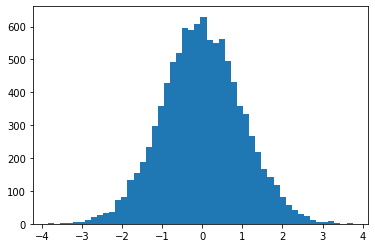

In [177]:
import matplotlib.pyplot as plt

plt.hist(arr1, bins=50)
plt.show();

In [181]:
print("median: ", np.median(arr1))
print("mean: ", np.mean(arr1))
print("variance: ", np.var(arr1))
print("standard: ", np.std(arr1))

median:  -0.021191325049618
mean:  -0.006049375369371288
variance:  0.9900154169676812
standard:  0.9949951843942166
